In [64]:
from rdkit import Chem
from rdkit.Chem import Draw

In [65]:
mols = [Chem.MolFromSmiles('NC(C)C(=O)' * x) for x in range(10)]
legends = ['mol-%d' % x for x in range(len(mols))]

In [66]:
# legends

In [67]:
# Draw.MolsToGridImage(mols, legends=legends)

In [68]:
s = "NC(C)C(=O)"
repeats = [[1], [0, 2], [3, 0, 4]]
mols_matrix = [[Chem.MolFromSmiles(s * count) for count in row] for row in repeats]
legends_matrix = [[str(count) for count in row] for row in repeats]
mols_matrix


[[<rdkit.Chem.rdchem.Mol at 0x16c580d60>],

In [69]:
legends_matrix

[['1'], ['0', '2'], ['3', '0', '4']]

In [70]:
mols_matrix[0]

In [71]:
legends_matrix[0]

['1']

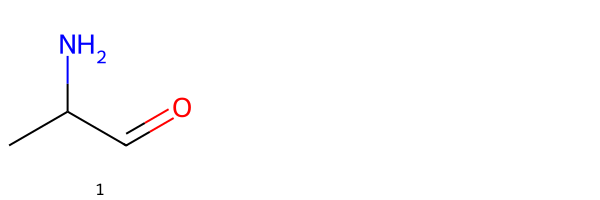

In [72]:
Draw.MolsToGridImage(mols_matrix[0], legends=legends_matrix[0])

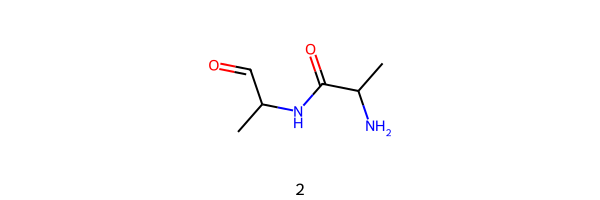

In [75]:
Draw.MolsToGridImage(mols_matrix[1], legends=legends_matrix[1])

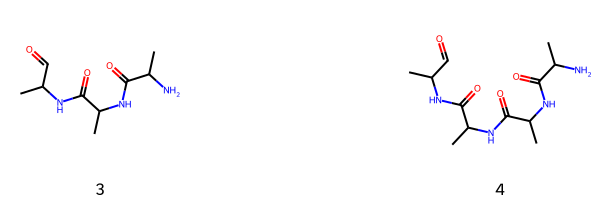

In [76]:
Draw.MolsToGridImage(mols_matrix[2], legends=legends_matrix[2])